<a href="https://colab.research.google.com/github/edada2018/Big-Data-Analysis---Standard-CNN-and-Bagging-Learning-CNN/blob/main/ELEG_6318_Deep_Learning_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#** ELEG 6318 Deep Learning Homework-1 - Spring 2025.:
** ELizabeth Dada - P21852546**

** TiTle: "Performing Comparison and Analysis on Perceptron with Different
 Activation Function and Loss Function".


** Step 1: Import Required Libraries

In [ ]:
# Step 1: Import Required Libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import drive
import os



In [ ]:
# Load Dataset from Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set Dataset Path
dataset_path = "/content/drive/My Drive/train_catvnoncat.h5"
test_dataset_path = "/content/drive/My Drive/test_catvnoncat.h5"


** Step 2: Load and Normalize the Dataset

In [ ]:
# Step 2: Load and Normalize the Datase
# Function to load dataset
def load_dataset():
    import h5py  # Ensure h5py is installed
    dataset = h5py.File("/content/drive/My Drive/train_catvnoncat.h5", "r")
    X_train = np.array(dataset["train_set_x"][:])  # Extract images
    Y_train = np.array(dataset["train_set_y"][:]).reshape(1, -1)  # Extract labels

    dataset = h5py.File("/content/drive/My Drive/test_catvnoncat.h5", "r")
    X_test = np.array(dataset["test_set_x"][:])  # Extract images
    Y_test = np.array(dataset["test_set_y"][:]).reshape(1, -1)  # Extract labels
    return X_train, Y_train, X_test, Y_test

# Load dataset
X_train, Y_train, X_test, Y_test = load_dataset()

# Normalize dataset
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images into feature vectors
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T


** step 3: Initialize Parameters

In [ ]:
# step 3: Initialize Parameters
def initialize_parameters(dim):
    w = np.zeros((dim, 1))  # Initialize weights as zeros
    b = 0  # Initialize bias as zero
    return w, b



** Step 4: Define Activation Function (Sigmoid)**

In [ ]:
# Step 4: Define Activation Function (Sigmoid)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


** Step 5: Define Forward Propagation (Group 1 and Group 2) **

In [ ]:
# Step 5: Define Forward Propagation (Group 1 and Group 2)

# Forward propagation for Group 1
def forward_propagation_group1(w, b, X):
    Z = np.dot(w.T, X) * 5 + 3 * b  # Group 1 formula
    A = sigmoid(Z)
    return A

# Forward propagation for Group 2
def forward_propagation_group2(w, b, X):
    Z = np.dot(w.T, X) + b  # Group 2 formula
    A = sigmoid(Z)
    return A


** Step 6: Define Loss Function**

In [ ]:
# Step 6: Define Loss Function
# Compute loss function
def compute_loss(Y, A):
    m = Y.shape[1]
    loss = (1 / (2 * m)) * np.sum((Y - A) ** 2)  # Squared error loss
    return loss


** Step 7: Define Backward Propagation (with L2 Regularization)**

In [ ]:
# Step 7: Define Backward Propagation (with L2 Regularization)

# Backward propagation for Group 1
def backward_propagation_group1(X, Y, A, w, lambda_reg=0.01):
    m = X.shape[1]
    dZ = (A - Y) * A * (1 - A)
    dw = (1 / m) * np.dot(X, dZ.T) + (lambda_reg / m) * w  # L2 Regularization
    db = (1 / m) * np.sum(dZ)
    return dw, db

# Backward propagation for Group 2
def backward_propagation_group2(X, Y, A, w, lambda_reg=0.01):
    m = X.shape[1]
    dZ = (A - Y) * A * (1 - A)
    dw = (1 / m) * np.dot(X, dZ.T) + (lambda_reg / m) * w  # L2 Regularization
    db = (1 / m) * np.sum(dZ)
    return dw, db


** Step 8: Optimize Model with Early Stopping **

In [ ]:
# Step 8: Optimize Model with Early Stopping

# Optimization for Group 1
def optimize_group1(w, b, X, Y, num_iterations=2000, learning_rate=0.005):
    losses = []  # Reset loss list

    for i in range(num_iterations):
        A = forward_propagation_group1(w, b, X)
        loss = compute_loss(Y, A)
        dw, db = backward_propagation_group1(X, Y, A, w)

        w -= learning_rate * dw
        b -= learning_rate * db

        # Store loss every 100 iterations
        if i % 100 == 0:
            losses.append(loss)  # Append loss
            print(f"Iteration {i} | Loss: {loss:.5f}")  # Debugging print

    return w, b, losses

# Optimization for Group 2
def optimize_group2(w, b, X, Y, num_iterations=2000, learning_rate=0.005):
    losses = []  # Reset loss list

    for i in range(num_iterations):
        A = forward_propagation_group2(w, b, X)
        loss = compute_loss(Y, A)
        dw, db = backward_propagation_group2(X, Y, A, w)

        w -= learning_rate * dw
        b -= learning_rate * db

        # Store loss every 100 iterations
        if i % 100 == 0:
            losses.append(loss)  # Append loss
            print(f"Iteration {i} | Loss: {loss:.5f}")  # Debugging print

    return w, b, losses


** Step 9: Train and Evaluate Both Groups**

In [ ]:
# Step 9: Train and Evaluate Both Groups

# Initialize and train Group 1
w1, b1 = initialize_parameters(X_train.shape[0])
w1, b1, losses_group1 = optimize_group1(w1, b1, X_train, Y_train)

# Initialize and train Group 2
w2, b2 = initialize_parameters(X_train.shape[0])
w2, b2, losses_group2 = optimize_group1(w2, b2, X_train, Y_train)

# Predictions
Y_pred_train_g1 = (forward_propagation_group1(w1, b1, X_train) > 0.5).astype(int)
Y_pred_test_g1 = (forward_propagation_group1(w1, b1, X_test) > 0.5).astype(int)

Y_pred_train_g2 = (forward_propagation_group2(w2, b2, X_train) > 0.5).astype(int)
Y_pred_test_g2 = (forward_propagation_group2(w2, b2, X_test) > 0.5).astype(int)

# Compute Metrics
train_acc_g1 = accuracy_score(Y_train.flatten(), Y_pred_train_g1.flatten()) * 100
test_acc_g1 = accuracy_score(Y_test.flatten(), Y_pred_test_g1.flatten()) * 100

train_acc_g2 = accuracy_score(Y_train.flatten(), Y_pred_train_g2.flatten()) * 100
test_acc_g2 = accuracy_score(Y_test.flatten(), Y_pred_test_g2.flatten()) * 100

print(f"Group 1 - Train Accuracy: {train_acc_g1:.2f}%, Test Accuracy: {test_acc_g1:.2f}%")
print(f"Group 2 - Train Accuracy: {train_acc_g2:.2f}%, Test Accuracy: {test_acc_g2:.2f}%")


Iteration 0 | Loss: 0.12500
Iteration 100 | Loss: 0.12008
Iteration 200 | Loss: 0.06530
Iteration 300 | Loss: 0.06460
Iteration 400 | Loss: 0.05840
Iteration 500 | Loss: 0.05203
Iteration 600 | Loss: 0.04596
Iteration 700 | Loss: 0.04017
Iteration 800 | Loss: 0.03463
Iteration 900 | Loss: 0.02948
Iteration 1000 | Loss: 0.02572
Iteration 1100 | Loss: 0.02367
Iteration 1200 | Loss: 0.02198
Iteration 1300 | Loss: 0.02047
Iteration 1400 | Loss: 0.01910
Iteration 1500 | Loss: 0.01788
Iteration 1600 | Loss: 0.01678
Iteration 1700 | Loss: 0.01580
Iteration 1800 | Loss: 0.01490
Iteration 1900 | Loss: 0.01409
Iteration 0 | Loss: 0.12500
Iteration 100 | Loss: 0.12008
Iteration 200 | Loss: 0.06530
Iteration 300 | Loss: 0.06460
Iteration 400 | Loss: 0.05840
Iteration 500 | Loss: 0.05203
Iteration 600 | Loss: 0.04596
Iteration 700 | Loss: 0.04017
Iteration 800 | Loss: 0.03463
Iteration 900 | Loss: 0.02948
Iteration 1000 | Loss: 0.02572
Iteration 1100 | Loss: 0.02367
Iteration 1200 | Loss: 0.02198
I

In [ ]:
# Print the stored Loss Values to verify they are updated

print(f"Loss values for Group 1: {losses_group1}")
print(f"Loss values for Group 2: {losses_group2}")


Loss values for Group 1: [0.125, 0.12008301671591766, 0.06530016722616772, 0.0646010617039882, 0.058399408949959423, 0.05203246740666929, 0.0459582686167881, 0.04017335754707033, 0.034631874497684456, 0.029476353492531433, 0.025722020170595192, 0.023670531242605843, 0.021981978345353814, 0.020465595792796703, 0.019104069002952834, 0.01788188152011376, 0.01678377667876139, 0.015795191402564572, 0.014902777555723444, 0.014094669988890174]
Loss values for Group 2: [0.125, 0.12008301671591766, 0.06530016722616772, 0.0646010617039882, 0.058399408949959423, 0.05203246740666929, 0.0459582686167881, 0.04017335754707033, 0.034631874497684456, 0.029476353492531433, 0.025722020170595192, 0.023670531242605843, 0.021981978345353814, 0.020465595792796703, 0.019104069002952834, 0.01788188152011376, 0.01678377667876139, 0.015795191402564572, 0.014902777555723444, 0.014094669988890174]


** # Step 10: Plot Learning Curves**

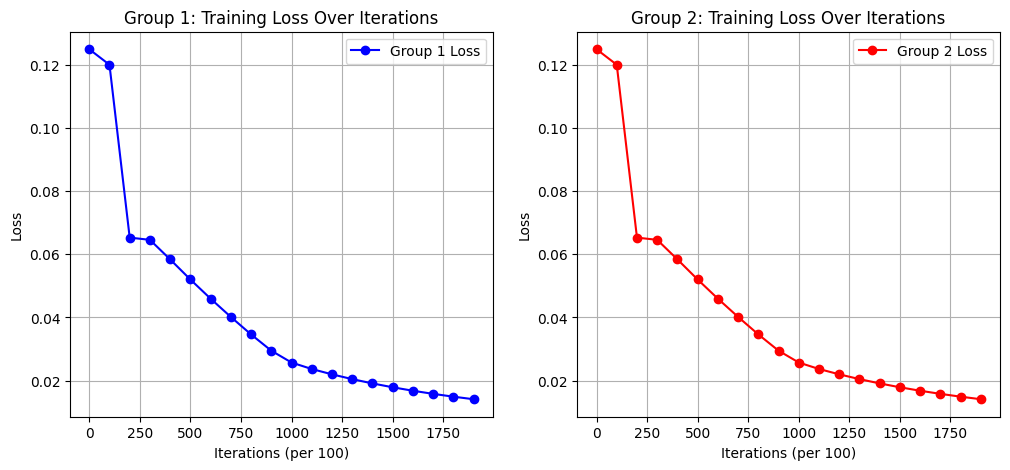

In [ ]:
# Step 10: Plot Learning Curves

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot for Group 1
plt.subplot(1, 2, 1)
plt.plot(range(0, len(losses_group1) * 100, 100), losses_group1, marker='o', color='b', label="Group 1 Loss")
plt.xlabel("Iterations (per 100)")
plt.ylabel("Loss")
plt.title("Group 1: Training Loss Over Iterations")
plt.legend()
plt.grid()

# Plot for Group 2
plt.subplot(1, 2, 2)
plt.plot(range(0, len(losses_group2) * 100, 100), losses_group2, marker='o', color='r', label="Group 2 Loss")
plt.xlabel("Iterations (per 100)")
plt.ylabel("Loss")
plt.title("Group 2: Training Loss Over Iterations")
plt.legend()
plt.grid()

plt.show()


**Observation**
*   Both models successfully learn, as the loss decreases over time.
*   Group 2 (red) has a steeper initial decline, which might indicate faster
  convergence.
*   Both models stabilize, meaning they are reaching a good point of optimization.

** 1. Compare Training and Test Accuracies**

In [ ]:
# Comparing Training Accuracy Vs Testing Accuracy

print(f"Group 1 - Train Accuracy: {train_acc_g1:.2f}%, Test Accuracy: {test_acc_g1:.2f}%")
print(f"Group 2 - Train Accuracy: {train_acc_g2:.2f}%, Test Accuracy: {test_acc_g2:.2f}%")


Group 1 - Train Accuracy: 99.52%, Test Accuracy: 68.00%
Group 2 - Train Accuracy: 99.52%, Test Accuracy: 68.00%


** 2. Computimg Precision, Recall, F1-score**

In [ ]:
# Computimg Precision, Recall, F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

precision_g1 = precision_score(Y_test.T, Y_pred_test_g1.T)
recall_g1 = recall_score(Y_test.T, Y_pred_test_g1.T)
f1_g1 = f1_score(Y_test.T, Y_pred_test_g1.T)

precision_g2 = precision_score(Y_test.T, Y_pred_test_g2.T)
recall_g2 = recall_score(Y_test.T, Y_pred_test_g2.T)
f1_g2 = f1_score(Y_test.T, Y_pred_test_g2.T)

print(f"Group 1 - Precision: {precision_g1:.2f}, Recall: {recall_g1:.2f}, F1-score: {f1_g1:.2f}")
print(f"Group 2 - Precision: {precision_g2:.2f}, Recall: {recall_g2:.2f}, F1-score: {f1_g2:.2f}")




Group 1 - Precision: 0.79, Recall: 0.70, F1-score: 0.74
Group 2 - Precision: 0.79, Recall: 0.70, F1-score: 0.74
